### Random Variables

<left> Author: Arun Prakash A </left>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import transforms as trans
from scipy import special
plt.style.use('ggplot')

In [2]:
%matplotlib inline

Let us simulate a coing tossing experiment. The random variable  $x$ takes 1 if Head appears 0 otherwise. <br>
 * We assume $P(x=0)=0.5$. <br>
 * np.random.rand(size) returns samples from the intervals $[0,1]$ with equal probability.

In [3]:
x = np.round(np.random.rand(1)) # first toss
print(x)
x = np.round(np.random.rand(1)) # secon toss
print(x)

[1.]
[0.]


In [4]:
# simulate 10 tosses 
x = np.round(np.random.rand(10))
print(x)

[0. 0. 0. 0. 0. 1. 1. 1. 0. 1.]


Let us draw the probability distribution of the random variable using the sample outputs. <br> Therefore, we need more number of observed outcomes, say 1000.

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


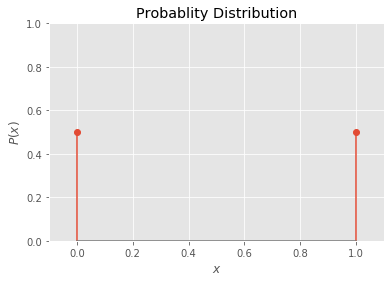

In [5]:
x = np.round(np.random.rand(1000))
# Let us take a long direct approach
count_0 = np.count_nonzero(x==0)
count_1 = np.count_nonzero(x==1)
px_0 = count_0/len(x)
px_1 = count_1/len(x)
# plot the bar grapg
plt.stem([0,1],[px_0,px_1])
plt.title('Probablity Distribution')
plt.xlabel(r'$x$')
plt.ylabel(r'$P(x)$')
plt.axis([-0.1,1.1,0,1])
plt.show()

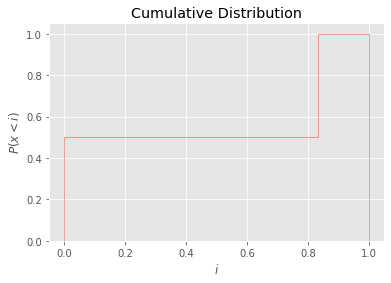

In [6]:
plt.hist(x,6,density=True,cumulative=True,histtype='step')
plt.title('Cumulative Distribution')
plt.xlabel(r'$i$')
plt.ylabel(r'$P(x<i)$')
plt.show()
#There is a small mistake, of course

Let us roll a six-faced die $n$ times and again assume $p(x=i)=\frac{1}{6}$

In [7]:
n=10
x = np.random.randint(0,7,(n)) # from uniform distribution
print(x)

[1 4 2 1 1 2 3 1 3 6]


C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


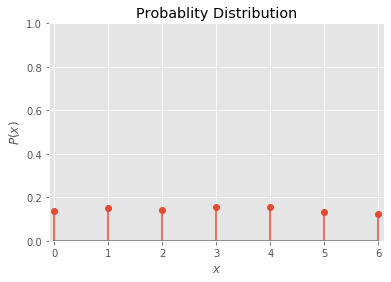

In [8]:
n = 1000
x = np.random.randint(0,7,(n))
px_i = []
# Let us take a long direct approach
for i in range(7):
    px_i.append(np.count_nonzero(x==i)/n)
    
# plot the bar grapg
plt.stem([0,1,2,3,4,5,6],px_i)
plt.title('Probablity Distribution')
plt.xlabel(r'$x$')
plt.ylabel(r'$P(x)$')
plt.axis([-0.1,6.1,0,1])
plt.show()

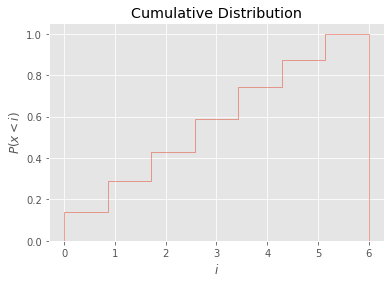

In [9]:
plt.hist(x,7,density=True,cumulative=True,histtype='step')
plt.title('Cumulative Distribution')
plt.xlabel(r'$i$')
plt.ylabel(r'$P(x<i)$')
plt.show()

Other Distributions: <br>

 1. Bernoulli , $Pr(k,p) = p^k (1-p)^{1-k}, k \in \{0,1\}$, that is, $P(k=0)=(1-p), P(k=1)=p$, if $p=q=\frac{1}{2}$, it becomes UDF.
 2. Binomial ,$Pr(k;n,p) = \begin{pmatrix}n \\ k \end{pmatrix} p^k (1-p)^{n-k}, k = 0,1,2....n$. Probability of obtaining $k$ sucess out of $n$ independent Bernoulli trails.

In [10]:
#binomial {You could have written a still better code using loops and lists}, i want it to be readble!
n = 30 
k = np.arange(0,n+1)
p = np.array([0.25,0.5,0.75])
q = 1-p
nCk = special.comb(n,k)
pk0 = p[0]**k
qk0 = q[0]**(n-k)
pk1 = p[1]**k
qk1 = q[1]**(n-k)
pk2 = p[2]**k
qk2 = q[2]**(n-k)
pq0 = np.multiply(pk0,qk0)
prob0 = np.multiply(nCk,pq0)
pq1 = np.multiply(pk1,qk1)
prob1 = np.multiply(nCk,pq1)
pq2 = np.multiply(pk2,qk2)
prob2 = np.multiply(nCk,pq2)

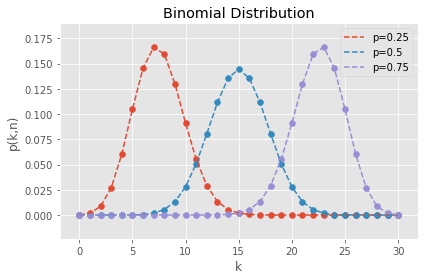

In [11]:
fig,ax = plt.subplots()
ax.scatter(k,prob0)
ax.scatter(k,prob1)
ax.scatter(k,prob2)
ax.plot(k,prob0,label='p=0.25',lineStyle='dashed')
ax.plot(k,prob1,label='p=0.5',lineStyle='dashed')
ax.plot(k,prob2,label='p=0.75',lineStyle='dashed')
ax.legend()
ax.set_xlabel('k')
ax.set_ylabel('p(k,n)')
ax.set_title('Binomial Distribution')
fig.tight_layout()

In [12]:
y0 = np.cumsum(prob0)
y1 = np.cumsum(prob1)
y2 = np.cumsum(prob2)

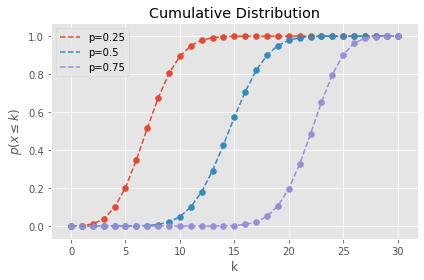

In [13]:
fig,ax = plt.subplots()
ax.scatter(k,y0)
ax.scatter(k,y1)
ax.scatter(k,y2)
ax.plot(k,y0,label='p=0.25',linestyle='dashed')
ax.plot(k,y1,label='p=0.5',linestyle='dashed')
ax.plot(k,y2,label='p=0.75',linestyle='dashed')
ax.legend()
ax.set_xlabel('k')
ax.set_ylabel(r'$p(x \leq k)$')
ax.set_title('Cumulative Distribution')
fig.tight_layout()

Standard Normal Distribution of a single Random Variable <br>

 * W.k.t if the gaussian RV is not zero mean and unit variance, it could be converted to normal distribution by <br> subtracting each observation by the mean and divide it by the variance.
 * $x \sim N(0,1) = P(x) = \frac{1}{\sqrt{2\pi}} \exp \bigg(\frac{-1}{2}x^2\bigg), -\infty < x < \infty$
 * The code below generates zero mean unit variance gaussian RV. 

In [14]:
x = np.random.randn(1,100) # an observed data
x = x.reshape(100)
x_org = np.linspace(-3,3,100)
p_x = (1/np.sqrt(2*np.pi))*np.exp(-0.5*x_org**2) # original distribution
# Let us presume that we don't know about the distribution of x

For a better illustration, we play with some matplotlib settings

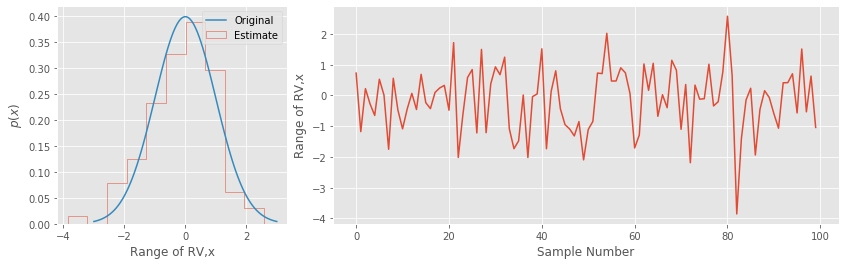

In [15]:
# Let us create a layout
gridsize = (1,3)
fig = plt.figure(figsize=(14,4))
ax1 = plt.subplot2grid(gridsize,(0,1),colspan=2,rowspan=1)
ax2 = plt.subplot2grid(gridsize,(0,0),colspan=1,rowspan=1)
ax2.hist(x,10,density=True,histtype='step',orientation='vertical',label='Estimate')
ax2.plot(x_org,p_x,label='Original')
ax2.legend()
ax2.set_xlabel('Range of RV,x')
ax2.set_ylabel(r'$p(x)$')
ax1.plot(x)
ax1.set_xlabel('Sample Number')
ax1.set_ylabel('Range of RV,x')
plt.show()

Non-zero Mean Gaussian Random Variable

 * Observe the shift along the y-axis in the observed sequence.

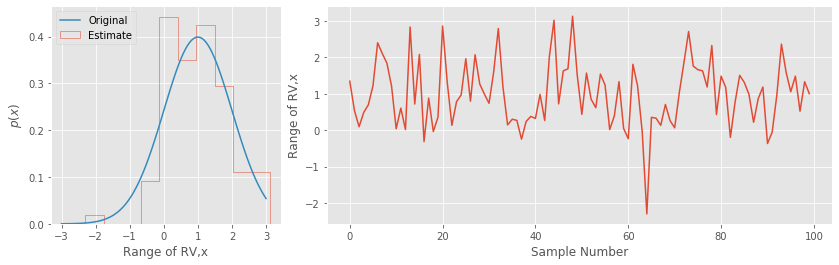

In [16]:
x = np.random.randn(1,100)+1 # an observed data
x = x.reshape(100)
x_org = np.linspace(-3,3,100)
p_x = (1/np.sqrt(2*np.pi))*np.exp(-0.5*(x_org-1)**2) # original distribution centered around mean
#Ploting
gridsize = (1,3)
fig = plt.figure(figsize=(14,4))
ax1 = plt.subplot2grid(gridsize,(0,1),colspan=2,rowspan=1)
ax2 = plt.subplot2grid(gridsize,(0,0),colspan=1,rowspan=1)
ax2.hist(x,10,density=True,histtype='step',orientation='vertical',label='Estimate')
ax2.plot(x_org,p_x,label='Original')
ax2.legend()
ax2.set_xlabel('Range of RV,x')
ax2.set_ylabel(r'$p(x)$')
ax1.plot(x)
ax1.set_xlabel('Sample Number')
ax1.set_ylabel('Range of RV,x')
plt.show()

## Joint PDF

 * Often visualizing the joint pdf of two (iid) random variables requires more number of observations.We could infer the mean and covariance between the random variables using a scatter plot.
 * Here we consider a joint Gaussian PDF. 
 * Though, 3D visulaization is appealing to the eye, more information could directly be extracted from 2D.


In [17]:
from mpl_toolkits.mplot3d import Axes3D # To render 3D

In [18]:
x1= np.random.randn(1,200)
x2 = np.random.randn(1,200)

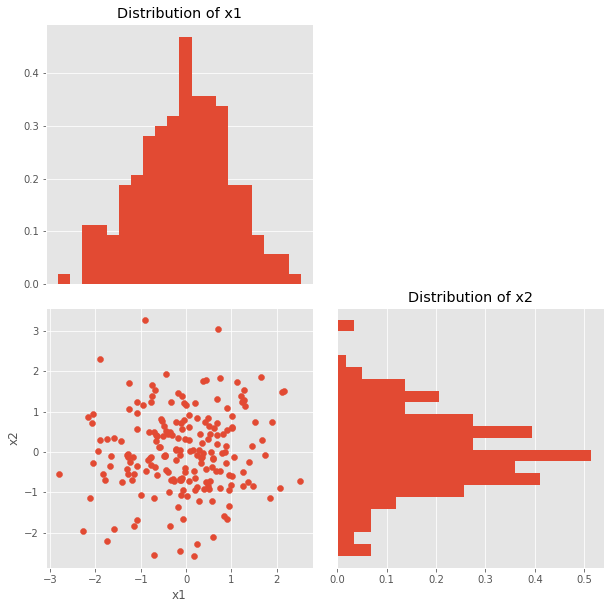

In [19]:
gridsize = (4,4)
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid(gridsize,(2,2),colspan=2,rowspan=2)
ax2 = plt.subplot2grid(gridsize,(0,0),colspan=2,rowspan=2)
ax3 =  plt.subplot2grid(gridsize,(2,0),colspan=2,rowspan=2)

ax3.scatter(x1,x2)
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')

ax1.hist(x2[0],20,density=True,orientation='horizontal')
ax1.set_title('Distribution of x2')
ax1.axes.get_yaxis().set_visible(False)

ax2.hist(x1[0],20,density=True)
ax2.set_title('Distribution of x1')
ax2.axes.get_xaxis().set_visible(False)


plt.show()

Lets make a quick 3D visualization with 20000 Observations

In [20]:
x1= np.random.randn(1,20000)
x2 = np.random.randn(1,20000)

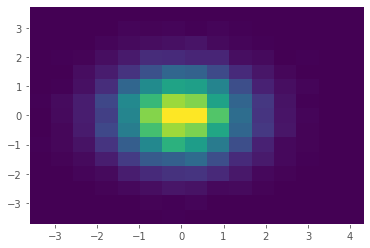

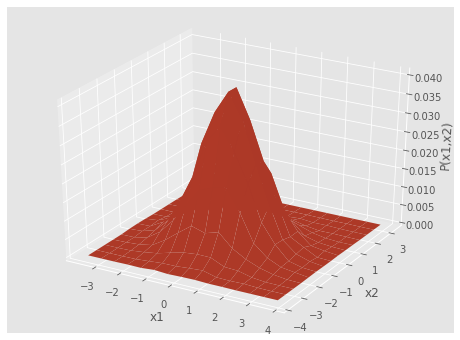

In [21]:
h,x,y,_=plt.hist2d(x1[0],x2[0],15)
x,y = np.meshgrid(x,y)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(x[:15,:15],y[:15,:15],h/(20000))
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('P(x1,x2)')
plt.show()

Let us also set the covariance to the following combination <br>

 * $\sigma_{11} = 1,\sigma_{22}=1,\sigma_{12}=0,\sigma_{21}=0 $. This produces the plot as show in the above figures.
 * We can play with other settings, say,$\sigma_{11} = 1,\sigma_{22}=1,\sigma_{12}=0.5,\sigma_{21}=0.5 $. However, we can't generate the samples from the joint PDF as we did before, <br> ('''
 x1= np.random.random(0,0.5,200),x2 = np.random.randn(0,0.5,200)'''). 
 
 * Because of iid assumption, w.k.t $\sigma^2_{x_1+x_2} = \sigma^2_{x_1}+\sigma^2_{x_2}$

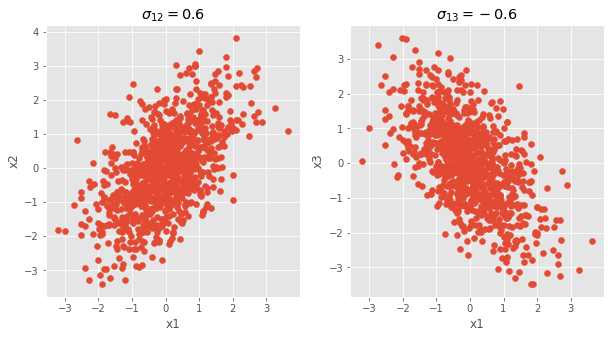

In [22]:
x1 = np.random.normal(0,1,1000)
x2 = 0.7*x1+np.random.normal(0,1,1000)
Cx1x2 = np.cov( np.array([x1,x2]),rowvar=True)
x3 = -0.7*x1+np.random.normal(0,1,1000)
Cx1x3 = np.cov( np.array([x1,x3]),rowvar=True)
#plotting
fig,[ax0,ax1] = plt.subplots(1,2,figsize=(10,5))
ax0.scatter(x1,x2)
ax0.set_xlabel('x1')
ax0.set_ylabel('x2')
ax0.set_title(r'$\sigma_{12}=0.6$')
ax1.scatter(x1,x3)
ax1.set_xlabel('x1')
ax1.set_ylabel('x3')
ax1.set_title(r'$\sigma_{13}=-0.6$')
plt.show()

Let us do something extra by plotting the confidence interval

 * https://mathworld.wolfram.com/BivariateNormalDistribution.html

 * https://matplotlib.org/3.1.1/gallery/statistics/confidence_ellipse.html#sphx-glr-gallery-statistics-confidence-ellipse-py

In [26]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [23]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`

    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [24]:
# Let us generate some data from the distribution
x1 = np.random.normal(0,1,1000)
x2 = 0.7*x1+np.random.normal(0,1,1000)
C12 = np.cov( np.array([x1,x2]),rowvar=True)
x3 = -0.7*x1+np.random.normal(0,1,1000)
C13 = np.cov( np.array([x1,x3]),rowvar=True)

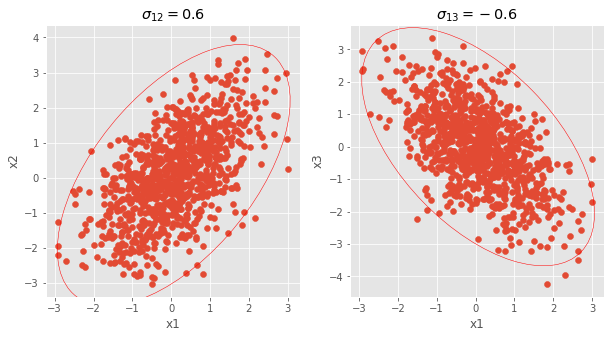

In [28]:
fig,[ax0,ax1] = plt.subplots(1,2,figsize=(10,5))
ax0.scatter(x1,x2)
confidence_ellipse(x1,x2,ax0,edgecolor='red')
ax0.set_xlabel('x1')
ax0.set_ylabel('x2')
ax0.set_title(r'$\sigma_{12}=0.6$')
ax1.scatter(x1,x3)
confidence_ellipse(x1,x3,ax1,edgecolor='red')
ax1.set_xlabel('x1')
ax1.set_ylabel('x3')
ax1.set_title(r'$\sigma_{13}=-0.6$')
plt.show()